In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler


In [65]:
df = pd.read_csv(r"C:\Users\a\OneDrive\Desktop\ML\movie\movies.csv")
df.head(5)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [66]:
df.dtypes

Film                  object
Genre                 object
Lead Studio           object
Audience score %       int64
Profitability        float64
Rotten Tomatoes %      int64
Worldwide Gross       object
Year                   int64
dtype: object

In [67]:
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\a\AppData\Local\Temp\ipykernel_1584\2358384682.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)


In [68]:
df_encoded = pd.get_dummies(df, columns=["Genre", "Lead Studio"], drop_first=True)


In [69]:
df_encoded = df_encoded.drop(columns=["Film"])


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [87]:
import numpy as np
from sklearn.metrics import pairwise_distances


kmeans_centers = kmeans.cluster_centers_
kmeans_dists = np.linalg.norm(X_scaled - kmeans_centers[kmeans_labels], axis=1)
kmeans_avg_dist = np.mean(kmeans_dists)


agglo_avg_dist = 0
for label in np.unique(agglo_labels):
    cluster_points = X_scaled[agglo_labels == label]
    centroid = cluster_points.mean(axis=0)
    dists = np.linalg.norm(cluster_points - centroid, axis=1)
    agglo_avg_dist += dists.mean()
agglo_avg_dist /= len(np.unique(agglo_labels))


dbscan_avg_dist = 0
valid_clusters = [label for label in set(dbscan_labels) if label != -1]
for label in valid_clusters:
    cluster_points = X_scaled[dbscan_labels == label]
    centroid = cluster_points.mean(axis=0)
    dists = np.linalg.norm(cluster_points - centroid, axis=1)
    dbscan_avg_dist += dists.mean()
if len(valid_clusters) > 0:
    dbscan_avg_dist /= len(valid_clusters)
else:
    dbscan_avg_dist = np.nan

gmm_centers = gmm.means_
gmm_dists = np.linalg.norm(X_scaled - gmm_centers[gmm_labels], axis=1)
gmm_avg_dist = np.mean(gmm_dists)


K-MEANS

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [73]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [74]:
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_score:.3f}")


KMeans Silhouette Score: 0.095


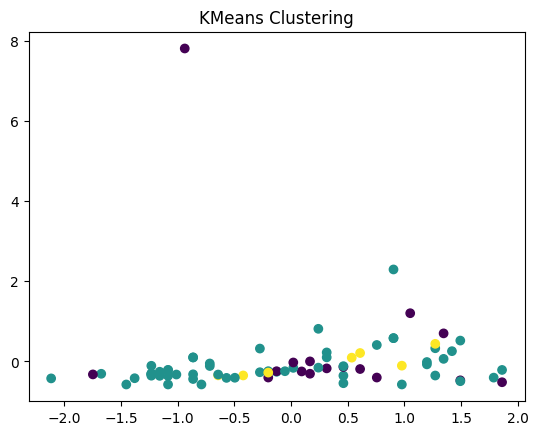

In [75]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()

DBSCAN

In [76]:
from sklearn.cluster import DBSCAN


In [77]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)



In [78]:
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    score = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"DBSCAN Silhouette Score (excluding noise): {score:.3f}")
else:
    print("DBSCAN there is no clustring ")



DBSCAN Silhouette Score (excluding noise): 0.622


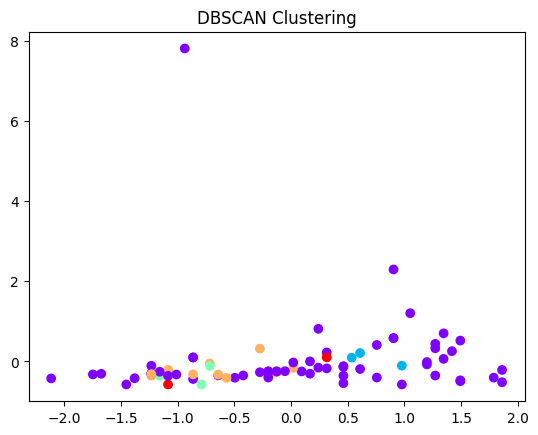

In [79]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.show()

Hierarchical 

In [80]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


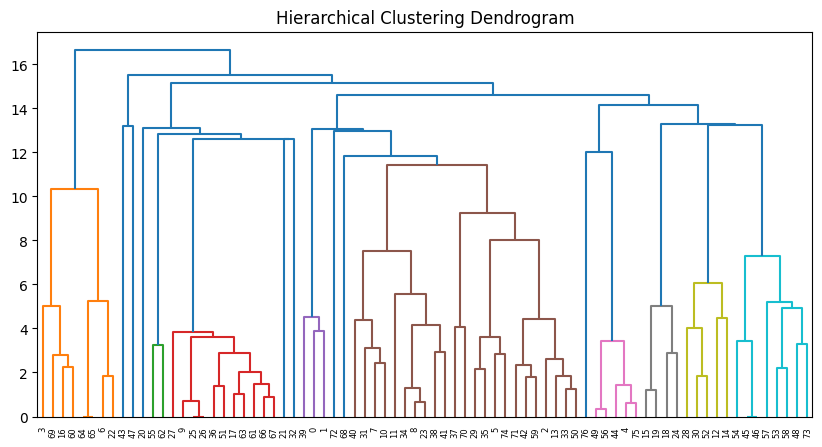

In [81]:
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [82]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)


In [83]:
agglo_score = silhouette_score(X_scaled, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_score:.3f}")


Agglomerative Clustering Silhouette Score: 0.112


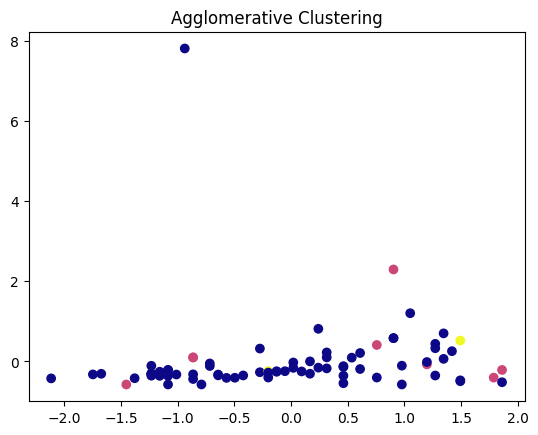

In [84]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='plasma')
plt.title("Agglomerative Clustering")
plt.show()

Gaussian Mixture Model (test)

Gaussian Mixture Silhouette Score: 0.109


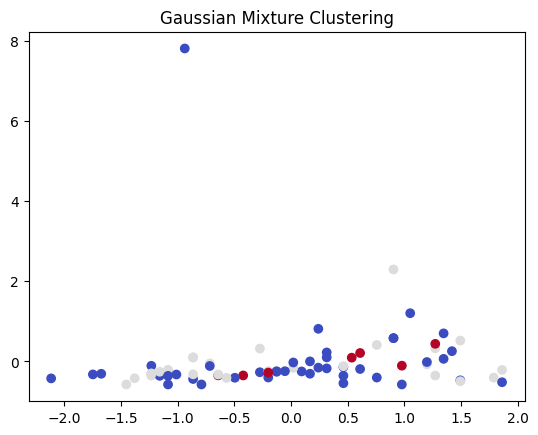

In [85]:
from sklearn.mixture import GaussianMixture

# اجرای GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# سیلوئت
gmm_score = silhouette_score(X_scaled, gmm_labels)
print(f"Gaussian Mixture Silhouette Score: {gmm_score:.3f}")

# رسم
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("Gaussian Mixture Clustering")
plt.show()

dsitance predict

In [86]:
max_dist = max(filter(lambda x: not np.isnan(x), [kmeans_avg_dist, agglo_avg_dist, dbscan_avg_dist, gmm_avg_dist]))
percentages = {
    "KMeans %": round((kmeans_avg_dist / max_dist) * 100, 2),
    "Agglomerative %": round((agglo_avg_dist / max_dist) * 100, 2),
    "DBSCAN %": round((dbscan_avg_dist / max_dist) * 100, 2) if not np.isnan(dbscan_avg_dist) else "N/A",
    "GMM %": round((gmm_avg_dist / max_dist) * 100, 2),
}

print("dist pred")
print(percentages)

dist pred
{'KMeans %': np.float64(91.78), 'Agglomerative %': np.float64(100.0), 'DBSCAN %': np.float64(16.83), 'GMM %': np.float64(91.64)}
